In [19]:
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import numpy as np
import pygad
import tsnet
import numpy
import shutil
import glob
import os

In [20]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (9,6)

In [22]:
try:
    shutil.rmtree('../tsnet_results/leak_size_results/add_leak_node6/temp')
    shutil.rmtree('../tsnet_results/leak_size_results/add_leak_node6/plots')
    print('Folders Deleted')
except FileNotFoundError as e:
    print(e)

# recreate deleted folders
os.makedirs('../tsnet_results/leak_size_results/add_leak_node6/temp')
os.makedirs('../tsnet_results/leak_size_results/add_leak_node6/plots')

Folders Deleted


In [123]:
class Setup:
    
    #Data path
    inp_file = '../data/Real_Synthetic_Net.inp'
    emitter_coefficient = .05
    
    #Pygad Parameters
    function_inputs = [.5, 1]
    num_generations=100
    num_parents_mating=1
    sol_per_pop=30
    num_genes = len(function_inputs)
    mutation_type= "adaptive"
    mutation_num_genes=(1, 1)
    
    start_node = 'N6'
    

In [205]:
class TransientModel_(Setup):
    
    def __init__(self, node):
        
        # Check if node is junction_name 
        tm = tsnet.network.model.TransientModel(self.inp_file)
        self.node = node
        
        #Setup all neccessary folders we need to work with, i.e. create them if they don't exist
        if not os.path.exists('../tsnet_results/leak_size_results/add_leak_node6/temp/solutions_for_'+self.node):
            os.mkdir('../tsnet_results/leak_size_results/add_leak_node6/temp/solutions_for_'+self.node)
            
        if not os.path.exists('../tsnet_results/leak_size_results/add_leak_node6/plots/plots_for_'+self.node):
            os.mkdir('../tsnet_results/leak_size_results/add_leak_node6/plots/plots_for_'+self.node)
        
        if not os.path.exists('../tsnet_results/leak_size_results/add_leak_node6/merged_results/'):
            os.mkdir('../tsnet_results/leak_size_results/add_leak_node6/merged_results/')
            
        self.temp_dir = '../tsnet_results/leak_size_results/add_leak_node6/temp/solutions_for_'+self.node
        self.plots_dir = '../tsnet_results/leak_size_results/add_leak_node6/plots/plots_for_'+self.node
        self.merged_results = '../tsnet_results/leak_size_results/add_leak_node6/merged_results/'
        
       
    def change_discharge_coefficient(self, tm, emitter_value, plot_graph=False):
        """
        This function changes the emitter coefficient for selected node in the network, and create a 
        structured representation of our data, a csv.
        
        parameters
        ----------
        wn: wntr network object
        emitter_value: the emitter coefficient value
        """
        
#         if emitter_value>1:
#             emitter_value=emitter_value%1
            
        # Change emitter coefficient
        tm.add_leak(self.node, self.emitter_coefficient)
        return self.simulate(tm, plot_graph=plot_graph)
        
    def simulate(self, tm, plot_graph=False):
        # Add leak and simulate
       
        # Set wavespeed
        tm.set_wavespeed(1000.) # m/s

        # Set time options
        tf = 290 # simulation period [s]
        tm.set_time(tf)
        
        # Set valve closure
        ts = 200 # valve closure start time [s] --> It needs 500s to warm-up.
        tc = 1 # valve closure period [s]
        se = 0 # end open percentage [s]
        m = 2 # closure constant [dimensionless]
        tm.valve_closure('V1',[tc,ts,se,m])

        # Initialize steady state simulation
        t0=0
        tm = tsnet.simulation.Initializer(tm,t0)

        # Transient simulation
        tm = tsnet.simulation.MOCSimulator(tm)

        # Results
        node = tm.get_node(self.node)
        x = node.head - node.elevation
        
        if plot_graph:
            plt.plot(x[:])
            plt.plot(x[0:1])
            time_window = range(1)

            # plot the artificial leak
            measurements = np.zeros((len(time_window),2))
            np.shape(measurements)
            measurements[:,0] = time_window * tm.simulation_timestamps[1]
            measurements[:,1] = x[0:1]
            plt.plot(measurements[:,0],measurements[:,1])
            plt.title('measured leak')
            plt.ylabel('Pressure (mwc)')
            plt.xlabel('time (s)')
            plt.savefig(self.plots_dir+'/observed_pressure_node_'+self.node+'.png')
            plt.show();
        
        return x
    
    def summary(self, x):
        return pd.Series(x).to_frame()
    

Simulation time step 0.25619 s
Total Time Step in this simulation 1131
Initial condition discrepancy of pressure (1.1623 m) on the N15 node
Initial condition discrepancy of pressure (2.8745 m) on the N16 node
Estimated simulation time 0:00:04.718532
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...


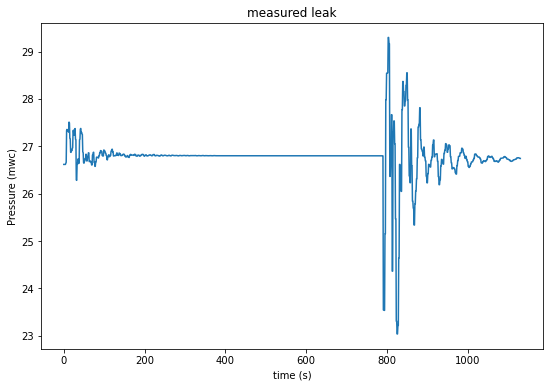

In [206]:
Setup.start_node = 'N6'
ts_model = TransientModel_(node=Setup.start_node)
tm = tsnet.network.TransientModel(ts_model.inp_file)
observed_pressure = ts_model.simulate(tm, plot_graph=True)

In [189]:
# Get the summary statistics of after simulation for Node 6
ts_model.summary(observed_pressure)

,0
0,26.618050
1,26.617952
2,26.617879
3,26.617807
4,26.617734
...,...
1048,26.720825
1049,26.781780
1050,26.781789
1051,26.796748


Simulation time step 0.25619 s
Total Time Step in this simulation 1053
Initial condition discrepancy of pressure (-25.3469 m) on the N6 node
Initial condition discrepancy of pressure (-25.3469 m) on the N6 node
Initial condition discrepancy of pressure (-25.3469 m) on the N6 node
Initial condition discrepancy of pressure (1.1623 m) on the N15 node
Initial condition discrepancy of pressure (2.8745 m) on the N16 node
Estimated simulation time 0:00:04.572126
Transient simulation completed 9 %...
Transient simulation completed 19 %...
Transient simulation completed 29 %...
Transient simulation completed 39 %...
Transient simulation completed 49 %...
Transient simulation completed 59 %...
Transient simulation completed 69 %...
Transient simulation completed 79 %...
Transient simulation completed 89 %...
Transient simulation completed 99 %...


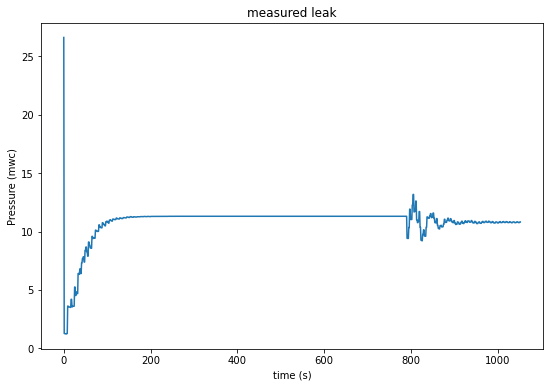

In [190]:
# Add Leak To Node 6 and Re-Simulate
Setup.start_node = 'N6'
ts_model = TransientModel_(node=Setup.start_node)
tm = tsnet.network.TransientModel(ts_model.inp_file)
simulated_pressure = ts_model.change_discharge_coefficient(tm, ts_model.emitter_coefficient, plot_graph=True)

<AxesSubplot:>

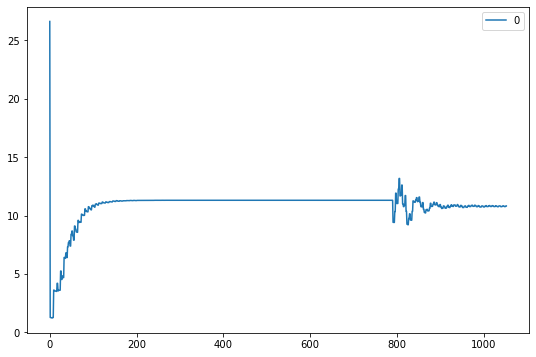

In [192]:
# Get the summary statistics of after adding leak for Node 6
simulated_pressure_summary = ts_model.summary(simulated_pressure)
simulated_pressure_summary.plot()

In [178]:
model_nodes= tm.node_name_list[0:16]
pprint(model_nodes)

['N1',
 'N5',
 'N10',
 'N7',
 'N2',
 'N6',
 'N3',
 'N8',
 'N13',
 'N9',
 'N14',
 'N4',
 'N11',
 'N12',
 'N15',
 'N16']


In [185]:
nodes = len(model_nodes)
function_inputs = [1, 1/nodes] #array save multiple things
desired_output = simulated_pressure.mean() # Function output, the objective is to match the measured leak.

In [186]:
desired_output, function_inputs

(10.799200986991956, [1, 0.0625])

In [ ]:
def fitness_func(solution, solution_idx):
    
    tm = tsnet.network.TransientModel('Real_Synthetic_Net.inp')
    
    # Set wavespeed
    tm.set_wavespeed(1000.) # m/s
    
    # Set time options
    tf = 270 # simulation period [s]
    
    tm.set_time(tf)
    
    # Add leak
    emitter_coeff = function_inputs[0]*solution[0]
    node_leak = model_nodes[int(function_inputs*solution[1])]
    ts_model.change_discharge_coefficient(node_leak, emitter_coeff, plot_graph=False)
    
    node = tm.get_node('N8')
    y = node.head - node.elevation
    y = ts_model.summary(y)
    output = y #numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(numpy.sum(output - desired_output)) + 0.000001)
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(numpy.sum(output - desired_output)) + 0.000001)
    return fitness

fitness_function = fitness_func

In [ ]:
# Print results:
last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation ={generation}".format(generation=ga_instance.generations_completed))
    print("Fitness ={fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change ={change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]
    
# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=300,
                        fitness_func=fitness_func,
                        num_parents_mating=1,
                        sol_per_pop=5,
                        num_genes=len(function_inputs),
                        mutation_type="adaptive",
                        mutation_num_genes=(1, 1))

In [ ]:
for index, val in enumerate(model_nodes1):
    ga_instance = pygad.GA(num_generations=100,
                                                fitness_func=fitness_func2,
                                                num_parents_mating=1,
                                                sol_per_pop=5,
                                                num_genes=function_inputs,
                                                mutation_type="adaptive",
                                                mutation_num_genes=(1, 1),
                                               callback_generation=callback_generation)
    
    current_node = index #index is the current number of iteration (0,1,2,3,4,5,6) for 16 nodes.
    
    # Running the GA to optimize the parameters of the function.
    ga_instance.run()
    
    # After the generations complete, some plots are shown that summarize how the outputs/fitenss values evolve over generations.
    ga_instance.plot_result()
    
    # Returning the details of the best solution.
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    print("Parameters of the best solution :{solution}".format(solution=solution))
    print("Fitness value of the best solution ={solution_fitness}".format(solution_fitness=solution_fitness))
    print("Index of the best solution :{solution_idx}".format(solution_idx=solution_idx))
    
    prediction = numpy.sum(numpy.array(function_inputs)*solution)
    print("Predicted output based on the best solution :{prediction}".format(prediction=prediction))
          
    if ga_instance.best_solution_generation != -1:
        print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))
    
    # Saving the GA instance.
    filename = 'genetic' # The filename to which the instance is saved. The  name is without extension.
    ga_instance.save(filename=filename)
    
    # Loading the saved GA instance.
    loaded_ga_instance = pygad.load(filename=filename)
    plt.plot(loaded_ga_instance.best_solutions_fitness)
    fitness_name = "Fitness_" + val
    plt.savefig(fitness_name)

    # Add leak
    emitter_coeff = function_inputs*solution    
    emitter_coeff_values_for_each_node.append({val:emitter_coeff})
    time_of_completion = datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')
    
    print(f'Simulation for: {val} \n Completed at: {time_of_completion}')

In [ ]:
# def fitness_function(solution, solution_idx):
#     global current_node
    
#     wn = wntr.network.WaterNetworkModel(water_model.inp_file_path)
    
#     emitter_coeff = solution[0]*water_model.function_inputs

#     results = water_model.change_discharge_coefficient(wn, emitter_value=abs(emitter_coeff)) #change emitter coefficient

#     pressure = results.node['pressure']
#     pressure_output = pressure.loc[:,water_model.node]

#     demands=results.node['demand']
#     demand_output = demands.loc[:,water_model.node]
    
#     fitness = 1.0 / (np.abs(pressure_output - water_model.desired_output) + 0.000001)

#     # Structure and export the output of the fitness
#     data = pd.DataFrame(columns=['EMITTER_COEFFICIENT_SOLUTION','PRESSURE_OUTPUT','OUTPUT_DEMAND','FITNESS'])
    
#     emitter_coeff=abs(solution[0]) 
    
#     if emitter_coeff>1:
#         emitter_coeff=emitter_coeff%1

#     data = data.append({'EMITTER_COEFFICIENT_SOLUTION':abs(emitter_coeff),\
#                         'PRESSURE_OUTPUT':list(pressure_output)[0],'FITNESS':list(fitness)[0],\
#                         'OUTPUT_DEMAND':(list(demand_output) [0]*1000),\
#                         'NODE': current_node},ignore_index=True)
    
#     data.to_csv(f"{water_model.temp_dir}/FITNESS_SOLUTION_{current_node}_{str(abs(solution[0]))}.csv",index=False) 

#     print('=====|SOLUTION|===========|OUTPUT|==================|FITNESS|==========|NODE|==========')
#     print ('======|', abs(round(solution[0],3)),'|===========|',\
#            list(round(pressure_output,3))[0],\
#            '|==================|',list(round(fitness, 3))[0],'|==========|',\
#            current_node,'|==========')
    
#     print('***********************************'*2)

#     return list(fitness)[0]